In [1]:
import config
import torch
import sys
sys.path.append('../util')
sys.path.append('../others_networks')
import time
from Trainer import Trainer
from util import measure_inference_speed, count_trainable_parameters
from DatasetReader import *

from DeepLabV3 import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
result_path = './DeepLabV3/'

In [ ]:
# from util import compile_xls_best_results
# compile_xls_best_results(result_path, output_file="deeplabv3.xlsx")

Arquivo salvo em: deeplabv3.xlsx


In [2]:
num_classes = config.num_classes
in_channels = config.in_channels

train_loader, test_loader, val_loader = get_datasets(dataset_dir=config.dataset_path, 
                                              resolution=config.dataset_resolution, 
                                              batch_size=config.batch_size)

torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])


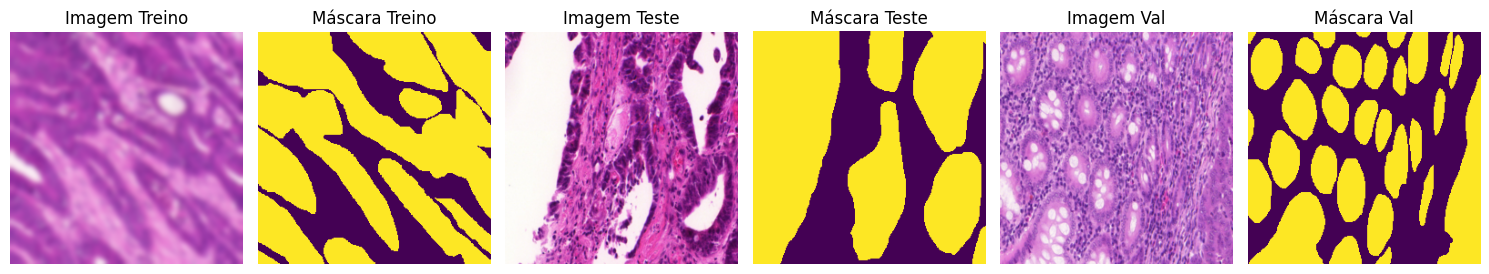

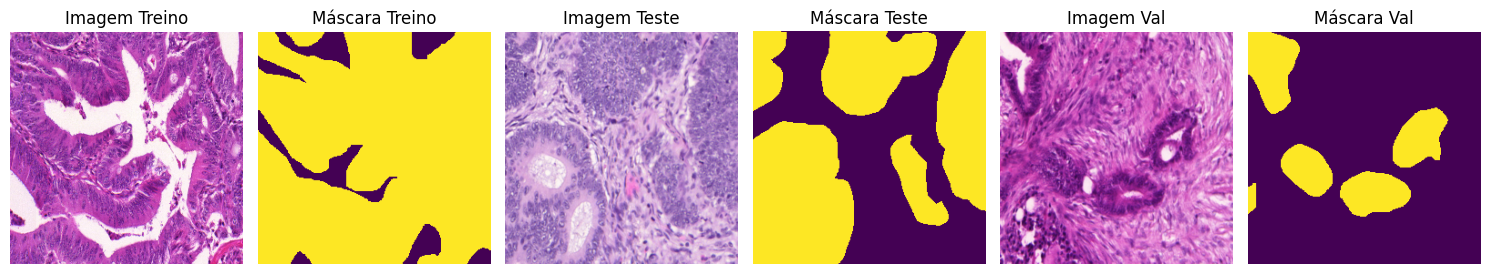

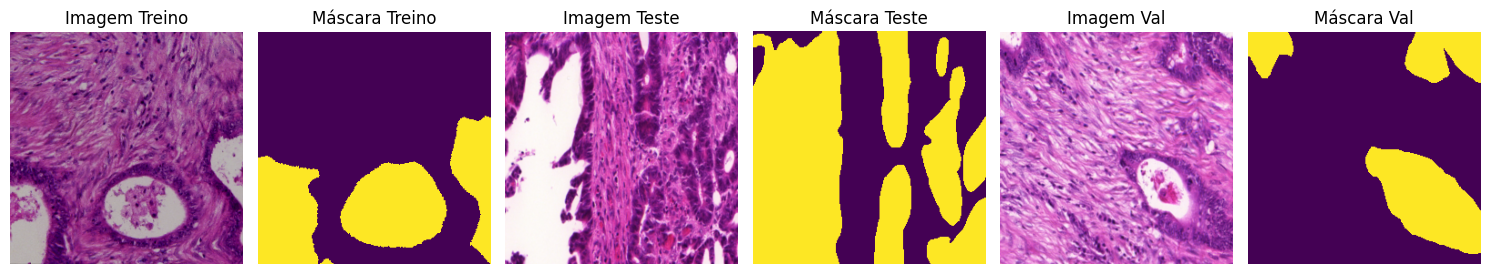

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [4]:
def train(model, model_name):
    epochs = 300
    model_filename = f'{model_name}-epochs{epochs}.pth'
    trainer = Trainer(model_filename=model_filename,
                    model_dir=result_path, 
                    info={'weights':'DEFAULT'},
                    save_xlsx=True)
    model = trainer.train(model, train_loader, val_loader, test_loader,
                            num_epochs=epochs, 
                            save_every=1, 
                            continue_from_last=True,
                            learning_rate=1e-3,
                            verbose=1)
    model.to(device)


In [5]:
model = DeepLabV3MobilenetV2Wrapper(in_channels=in_channels, out_channels=num_classes)
train(model,'DeepLabV3MobilenetV2Wrapper-1')

Loss function: BCEDiceLoss
trainable_parameters: 12647937
Parando na época 42 por early stopping. 0.2691 Dice: 0.8589 mIoU: 0.7543 F1: 0.8589 IoU: 0.7440 Prec: 0.8590 Recall: 0.8608 Q: 0.6494 Time: 00:03:43 LR:0.000500

Melhor modelo:
 Epoch [22/300] - Loss: 0.1921 Val Loss: 0.2535 Dice: 0.8641 mIoU: 0.7619 F1: 0.8641 IoU: 0.7532 Prec: 0.8645 Recall: 0.8652 Q: 0.6594 Time: 00:02:03 LR:0.001000
Ultimo modelo:
 Epoch [42/300] - Loss: 0.1833 Val Loss: 0.2691 Dice: 0.8589 mIoU: 0.7543 F1: 0.8589 IoU: 0.7440 Prec: 0.8590 Recall: 0.8608 Q: 0.6494 Time: 00:03:43 LR:0.000500
 GPU_FPS: 2591.0758301158303  CPU_FPS: 18.028051811848535
Saved as ./DeepLabV3//DeepLabV3MobilenetV2Wrapper-1-epochs300.pth


In [6]:
model = DeepLabV3MobilenetV2Wrapper(in_channels=in_channels, out_channels=num_classes)
train(model,'DeepLabV3MobilenetV2Wrapper-2')

Loss function: BCEDiceLoss
trainable_parameters: 12647937
Parando na época 29 por early stopping. 0.2752 Dice: 0.8569 mIoU: 0.7512 F1: 0.8569 IoU: 0.7407 Prec: 0.8574 Recall: 0.8587 Q: 0.6451 Time: 00:02:29 LR:0.000500

Melhor modelo:
 Epoch [9/300] - Loss: 0.2096 Val Loss: 0.2571 Dice: 0.8586 mIoU: 0.7534 F1: 0.8586 IoU: 0.7404 Prec: 0.8583 Recall: 0.8607 Q: 0.6479 Time: 00:00:48 LR:0.001000
Ultimo modelo:
 Epoch [29/300] - Loss: 0.1862 Val Loss: 0.2752 Dice: 0.8569 mIoU: 0.7512 F1: 0.8569 IoU: 0.7407 Prec: 0.8574 Recall: 0.8587 Q: 0.6451 Time: 00:02:29 LR:0.000500
 GPU_FPS: 2655.0428865326794  CPU_FPS: 19.2571465137547
Saved as ./DeepLabV3//DeepLabV3MobilenetV2Wrapper-2-epochs300.pth


In [7]:
model = DeepLabV3MobilenetV2Wrapper(in_channels=in_channels, out_channels=num_classes)
train(model,'DeepLabV3MobilenetV2Wrapper-3')

Loss function: BCEDiceLoss
trainable_parameters: 12647937
Parando na época 30 por early stopping. 0.2746 Dice: 0.8544 mIoU: 0.7472 F1: 0.8544 IoU: 0.7377 Prec: 0.8566 Recall: 0.8572 Q: 0.6397 Time: 00:02:34 LR:0.000500

Melhor modelo:
 Epoch [10/300] - Loss: 0.2087 Val Loss: 0.2549 Dice: 0.8600 mIoU: 0.7557 F1: 0.8600 IoU: 0.7461 Prec: 0.8599 Recall: 0.8609 Q: 0.6512 Time: 00:00:53 LR:0.001000
Ultimo modelo:
 Epoch [30/300] - Loss: 0.1858 Val Loss: 0.2746 Dice: 0.8544 mIoU: 0.7472 F1: 0.8544 IoU: 0.7377 Prec: 0.8566 Recall: 0.8572 Q: 0.6397 Time: 00:02:34 LR:0.000500
 GPU_FPS: 2583.5943792107796  CPU_FPS: 18.348052396865988
Saved as ./DeepLabV3//DeepLabV3MobilenetV2Wrapper-3-epochs300.pth
